### Minor Project - Heart Disease Prediction using Machine Learning

#### Importing the required libraries

In [1]:
import numpy as np # to work for arrays, linear algebra,fourier transformation
import pandas as pd # data analysis and manipulation of tabular data 
import matplotlib.pyplot as plt #for plting the graphs
import seaborn as sns #for making stastical graphs

%matplotlib inline 

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.git', '.ipynb_checkpoints', 'app.py', 'edit2 (1).ipynb', 'first.html', 'heart.csv', 'heart.jpg', 'hospital.jpg', 'main.html']


#### Importing the Dataset

In [5]:
data = pd.read_csv(r"C:\Users\Sapan\OneDrive\Documents\MINOR PROJECT\heart.csv")

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.shape

(303, 14)

In [8]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Understanding the columns of the dataset

In [12]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [13]:
data['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [14]:
data["target"].unique()

array([1, 0], dtype=int64)

#### So this is a classification problem with the target variable having values '0' and '1'

### Now checking correlation between columns

In [15]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Exploratory Data Analysis (EDA)

### first analysing the target variable 

1    165
0    138
Name: target, dtype: int64


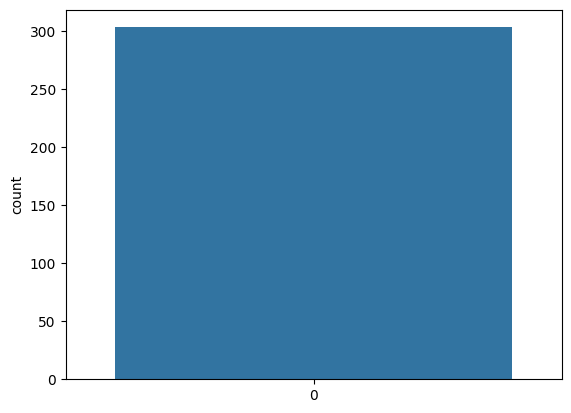

In [16]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### Now we will analyse 'sex', 'cp', 'fbs", 'restecg', exang', 'slope', 'ca', and 'thal' feactures

#### Analysing the 'Sex' feacture

In [4]:
data["sex"].unique()

NameError: name 'data' is not defined

As expected, the 'sex' feacture has 2 uinque feactures

In [18]:
# now plotting the sex ratio
sns.barplot(data["sex"],y)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

#### Analysing the 'Chest Pain Type' feacture

In [17]:
data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [18]:
#the cp feacture has values from 0 to 3

In [19]:
#plotting the graph
sns.barplot(data["cp"],y)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

#### Analysing the 'Fasting Blood Sugar (FBS)' feacture

In [20]:
data["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [21]:
data["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

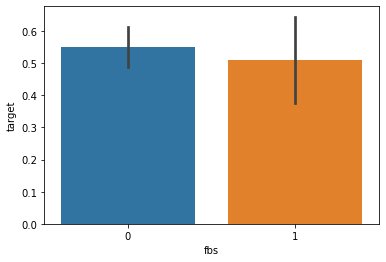

In [22]:
#plotting the graph
sns.barplot(data["fbs"],y)

#### Analysing the 'Resting Electro Cardiographic Results (restecg)' feacture

In [23]:
data["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

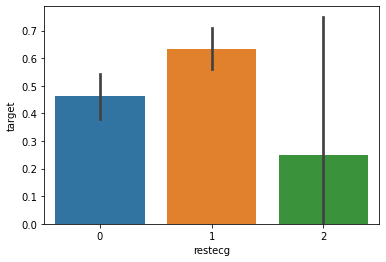

In [24]:
sns.barplot(data["restecg"],y)

In [25]:
# we find out that the people with the restecg '1' and '0' 
# are much more likely to have a heart disease than with restecg '2'

#### Analysing the 'Exercise - induced angina (exang)' feacture

In [26]:
data["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

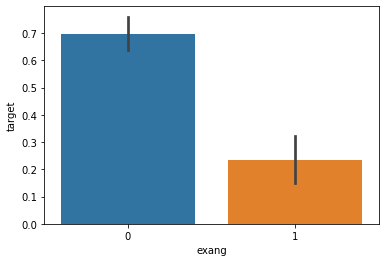

In [27]:
sns.barplot(data["exang"],y)

In [28]:
#people with exang =1 i.e. Exercise included angina are
# much less likely to have heart problems 

#### Analysing the 'Slope (slope of the peak exericse)' feacture

In [29]:
data["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

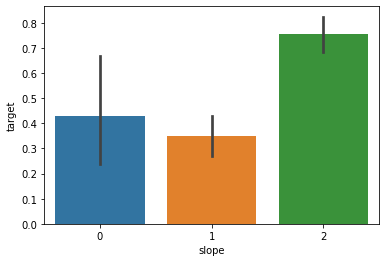

In [30]:
sns.barplot(data["slope"],y)

In [31]:
# So, slope '2' causes heart pain much more than
# slope '0' and '1'

#### Analysing the 'ca ( no of major vessels)' feacture

In [32]:
data["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

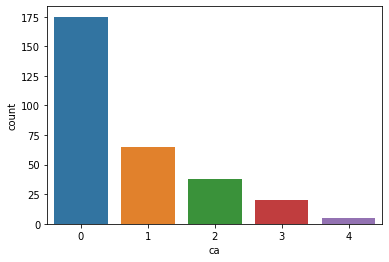

In [33]:
sns.countplot(data["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

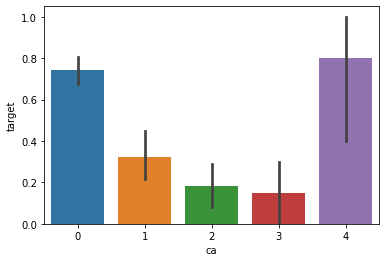

In [34]:
sns.barplot(data["ca"],y)

#### Analysing the 'thal' feacture

In [35]:
data["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

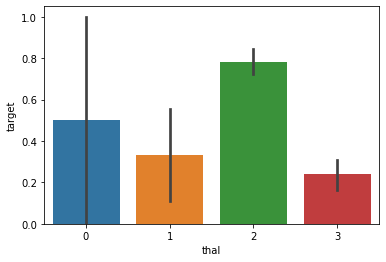

In [36]:
sns.barplot(data["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

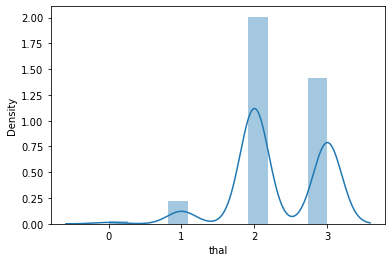

In [37]:
sns.distplot(data["thal"])

#### Training and Testing our model

In [3]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

NameError: name 'data' is not defined

In [39]:
X_train.shape

(242, 13)

In [40]:
X_test.shape

(61, 13)

In [41]:
Y_train.shape


(242,)

In [42]:
Y_test.shape

(61,)

#### V Model fitting

In [43]:
from sklearn.metrics import accuracy_score

#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [45]:
Y_pred_lr.shape

(61,)

In [46]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


#### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [48]:
Y_pred_nb.shape

(61,)

In [49]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


#### Support Vector Machine (SVM)

In [50]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [51]:
Y_pred_svm.shape

(61,)

In [52]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


#### K Nearest Neighbors (KNN)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [54]:
Y_pred_knn.shape

(61,)

In [55]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


#### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [57]:
print(Y_pred_dt.shape)

(61,)


In [58]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

#### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

#### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

In [ ]:
Y_pred_nn = model.predict(X_test)

In [86]:
Y_pred_nn.shape

(61, 1)

In [87]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [88]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 81.97 %


In [89]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 81.97 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

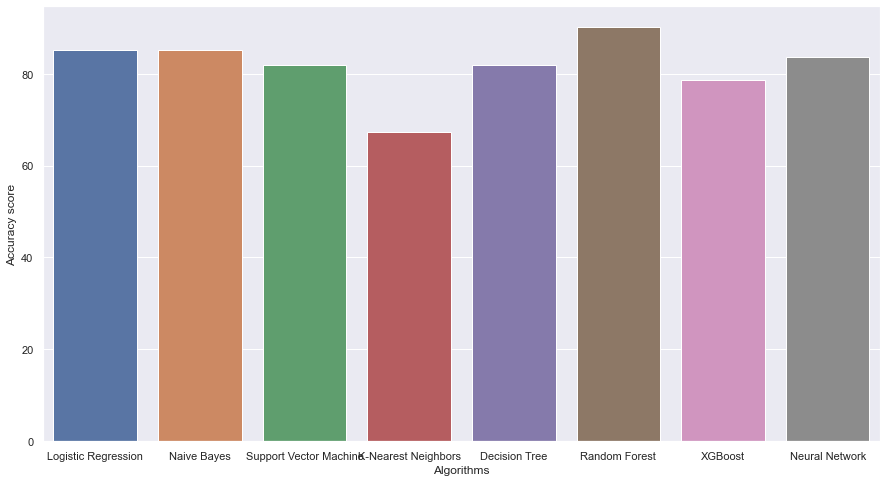

In [87]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [20]:
! pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pickle


In [2]:
filename='weigth_pred_model'
pickle.dump(rf,open(filename,'wb'))

NameError: name 'rf' is not defined